In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

In [10]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM

In [11]:
# load data
company = 'FB'

In [12]:
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2021, 4, 30)

In [13]:
data = web.DataReader(company , 'yahoo' , start , end)

In [14]:
#prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])


x_train , y_train = np.array(x_train) , np.array(y_train)
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1], 1))


In [15]:
# build The Mobel
model = Sequential()

model.add(LSTM(units=50,return_sequences=True , input_shape=(x_train.shape[1] , 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True ))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #predict of the next closing price

model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit(x_train, y_train , epochs=25, batch_size=32)


Epoch 1/25
69/69 [==============================] - 32s 242ms/step - loss: 0.0363
Epoch 2/25
69/69 [==============================] - 17s 244ms/step - loss: 0.0026
Epoch 3/25
69/69 [==============================] - 22s 318ms/step - loss: 0.0021
Epoch 4/25
69/69 [==============================] - 27s 396ms/step - loss: 0.0020
Epoch 5/25
69/69 [==============================] - 31s 457ms/step - loss: 0.0020
Epoch 6/25
69/69 [==============================] - 31s 452ms/step - loss: 0.0016
Epoch 7/25
69/69 [==============================] - 29s 427ms/step - loss: 0.0018
Epoch 8/25
69/69 [==============================] - 31s 453ms/step - loss: 0.0017
Epoch 9/25
69/69 [==============================] - 30s 428ms/step - loss: 0.0018
Epoch 10/25
69/69 [==============================] - 30s 431ms/step - loss: 0.0018
Epoch 11/25
69/69 [==============================] - 31s 443ms/step - loss: 0.0019
Epoch 12/25
69/69 [==============================] - 30s 435ms/step - loss: 0.0016
Epoch 13/25
6

In [16]:
#test the model accuricey on exesting data

#Loading test data
test_start = dt.datetime(2020, 1 , 1 )
test_end = dt.datetime.now()

test_data = web.DataReader(company , 'yahoo' , test_start , test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs  = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


In [17]:
# make prediction on test data

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x , 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


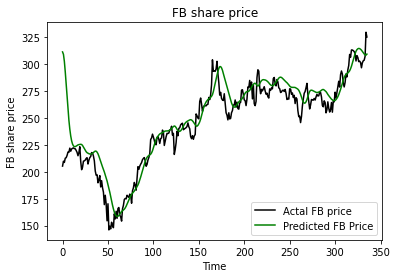

In [20]:
# plot the prediction 
plt.plot(actual_prices , color="black", label=f"Actal {company} price")
plt.plot(predicted_prices, color='green', label=f"Predicted {company} Price")
plt.title(f"{company} share price")
plt.xlabel('Time')
plt.ylabel(f'{company} share price')
plt.legend()
plt.show()


In [23]:
#predict the next day
real_data = [model_inputs[len(model_inputs) + - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"prediction:{prediction}")

prediction:[[311.25058]]
